# **Independent Work 1:**

## By Ilkhomzhon Sidikov

# Part 1:
 
## *   Implement Maclaurin Polynomial. Input: f(x), n. Output: P_n(x)
## *   Implement Taylor Polynomial. Input: f(x), c, n. Output: P_n(x)
## *   Bonus: Comparing the graphs of f(x) and P_n(x)


# Part 2:

## *   Approximate Pi using arctan1
## *   Approximate Pi using Ramanujan's Series (page 663, Exercise:61)
## *   Bonus: Compare these two approximations


### Code block for bigger outputs fonts

In [19]:
### Code block for bigger outputs fonts
def increase_font():               
  from IPython.display import Javascript
  display(Javascript('''
  for (rule of document.styleSheets[0].cssRules){
    if (rule.selectorText=='body') {
      rule.style.fontSize = '26px'
      break
    }
  }
  '''))
increase_font()
##

get_ipython().events.register('pre_run_cell', increase_font)  # Bigger Outputs by defauls

<IPython.core.display.Javascript object>

### Part 1: Taylor & Maclaurin Series Approximation


<IPython.core.display.Javascript object>

Enter the function: exp(x)
For Taylor Series: 'T' ot 't' /// For Maclaurin Series: 'M' or 'm't
Enter the center point: 1
Enter number of terms: 5
 
Approximation of a function exp(x) centered at 1 after 5 terms: 
By implemented method: 
2.71828 + 2.71968*(x - 1)^1 + 1.35925*(x - 1)^2 + 0.45102*(x - 1)^3 + 0.1131*(x - 1)^4 + 0.02338*(x - 1)^5

By Build in Sci-pi Function: 
         5          4          3         2
0.02253 x + 0.1132 x + 0.4531 x + 1.359 x + 2.718 x + 2.718
 


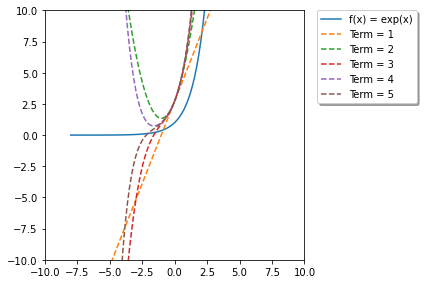

In [27]:
from ipywidgets.widgets.widget_int import IntSlider
from sympy import var
from scipy.misc import derivative
import numpy as np
from sympy import sympify
from sympy.utilities.lambdify import lambdify
from scipy.interpolate import approximate_taylor_polynomial   #Importing Build In Function of Sci-Py Library
from math import e , pi
import matplotlib.pyplot as plt
import math


#Taking F(x) from the user

x = var('x') 
user_func = input("Enter the function: ")  
method = input("For Taylor Series: 'T' ot 't' /// For Maclaurin Series: 'M' or 'm'")
center = 0


#Choice of Maclaurin
if method == 'T' or method == 't':
  center = int(input("Enter the center point: "))

nterms = int(input("Enter number of terms: "))

#Making function responsive

expr = sympify(user_func)
f = lambdify(x, expr)



#Implementation of Taylor series:

def TaylorS(func, term, center):
  coeff = []
  deriv = 2 * term
  result = ''

  if deriv % 2 == 0: deriv += 1

  for i in range(0, term + 1):
    coeff.append(round(derivative(func, center, n=i, order=deriv) / math.factorial(i), 5))

  for i in range(term + 1):
    if coeff[i] != 0:
      result += str(coeff[i]) + ("*(x - {})^{}".format(center, i) if i > 0 else "") + " + "
  
  if result.endswith(" + "):
    result = result[:-3] 
  return result



#Values to plot the graph

x = np.linspace(-8.0, 8.0, num=100)
plt.plot(x, f(x), label=f"f(x) = {user_func}")

print(' ')
print("Approximation of a function", user_func, "centered at", center, "after",nterms,"terms: ")
print('By implemented method: ')
print(TaylorS(f,nterms,center))
print('')



#Comparing the implemention with build-in Taylor series function of Sci-Py Library:

for term in np.arange(1, nterms+1):
    taylor = approximate_taylor_polynomial(f, center, term, 1, order=term + 2)
    plt.plot(x, taylor(x),'--', label=f"Term = {term}")

print('By Build in Sci-pi Function: ')
print(taylor)
print(' ')



#Graphing

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.0, shadow=True)
plt.tight_layout()
plt.axis([-10, 10, -10, 10])
plt.show()


________________________________________________________________________________________________________________________________________________________________


###Part 2:

### I approximated Pi number in 3 different ways and so far Ramanujan's method is clear winner among them. 
### Then, Arctan(1) approximation gives with 5-6th decimal digit precision. 
### Also, I implemented Monte Carlo Method because it was one of the coding questions that I like. It gives around 2-3 decimal digit precision



In [31]:
# "ArcTan(1)"  Pi Approximation

import math

res = 0
steps = 10000000  #for each method I used 10 million iterations

for x in range(steps):
  numerator = math.pow(-1, x) * math.pow(1, 2*x+1)
  denominator = 2*x+1
  res += numerator/denominator

res = res*4

print("Estimated Pi: ",res) 
print("Actual Pi:    ",math.pi)

sres = str(res)
spi = str(math.pi)

# Calculating precision
match = 0
for i in range(min(len(sres),len(spi))):
  if sres[i] == spi[i]:
    match+=1
  else:
     break

print(' ')
print("Arctan(1) in "+str(steps)+" steps approximates with "+str(match-2)+"th decimal digit precision")

<IPython.core.display.Javascript object>

Estimated Pi:  3.1415925535897915
Actual Pi:     3.141592653589793
 
Arctan(1) in 10000000 steps approximates with 6th decimal digit precision


In [22]:
# "RAMANUJAN" Pi Approximation

import math
# Factorial Function
def factorial(x):
    if x==0:
        return 1
    else:
      r = x*factorial(x-1)
      return r

sum = 0
n = 0
i = (math.sqrt(8))/9801

while True:
        #Ramanujan Formula:
        step = i*(factorial(4*n)/math.pow(factorial(n),4)) * ((26390*n+1103)/math.pow(396,4*n))
        sum += step
        
        #Stops when it reaches 15th digit precision
        if(abs(step) < 1e-15):
            break
        n += 1

res = 1/sum


print("Estimated Pi: ",res) 
print("Actual Pi:    ",math.pi)

sres = str(res)
spi = str(math.pi)

# Calculating precision
match = 0
for i in range(min(len(sres),len(spi))):
  if sres[i] == spi[i]:
    match+=1
  else:
     break
print(' ')
print("Ramanujan's Method approximates Pi with "+str(match-2)+"th decimal digit precision")


<IPython.core.display.Javascript object>

Estimated Pi:  3.141592653589793
Actual Pi:     3.141592653589793
 
Ramanujan's Method approximates Pi with 15th decimal digit precision


In [30]:
# "MONTE CARLO" Pi Approximation 

import numpy as np

nSteps = 10000000
radius = 1
dotsInside = 0


#Uniformly plotting dots in 1x1 square that has unit circle inside

XrandCoords = np.random.default_rng().uniform(-1, 1, (nSteps,))  
YrandCoords = np.random.default_rng().uniform(-1, 1, (nSteps,))
 
for i in range(nSteps):
    x = XrandCoords[i]
    y = YrandCoords[i]

    if x**2+y**2<=radius**2:
        dotsInside = dotsInside + 1


res = 4*dotsInside/nSteps

print("Estimated Pi: ",res) 
print("Actual Pi:    ",math.pi)

sres = str(res)
spi = str(math.pi)

# Calculating precision
match = 0
for i in range(min(len(sres),len(spi))):
  if sres[i] == spi[i]:
    match+=1
  else:
     break
print(' ')
print("Monte Carlo Method in "+str(nSteps)+" steps approximates with "+str(match-2)+" decimal digit precision.")
print("*** Monte Carlo Method gives different approximation at each run ***")


<IPython.core.display.Javascript object>

Estimated Pi:  3.1416116
Actual Pi:     3.141592653589793
 
Monte Carlo Method in 10000000 steps approximates with 3 decimal digit precision.
*** Monte Carlo Method gives different approximation at each run ***
